# 05. Polynomial Regression | الانحدار متعدد الحدود

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 4: Linear Regression** - Understand basic regression first!
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic math**: Understanding of polynomials (x², x³, etc.)

**If you haven't completed these**, you might struggle with:
- Understanding why we need polynomial regression
- Knowing when to use polynomial vs linear regression
- Understanding overfitting and how to detect it

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FIFTH example** - it extends linear regression to handle non-linear relationships!

**Why this example FIFTH?**
- **Before** you can handle non-linear data, you need to understand linear regression
- **Before** you can choose model complexity, you need to see overfitting
- **Before** you can use advanced models, you need to understand the bias-variance tradeoff

**Builds on**: 
- 📓 Example 4: Linear Regression (we know how linear models work)

**Leads to**: 
- 📓 Unit 2: Advanced Regression (Ridge, Lasso - handle overfitting better)
- 📓 Unit 3: Classification Models (same concepts apply)
- 📓 All ML models (overfitting is a universal problem!)

**Why this order?**
1. Polynomial regression shows **when linear models fail** (non-linear relationships)
2. Polynomial regression teaches **overfitting** (critical ML concept)
3. Polynomial regression demonstrates **model complexity tradeoffs** (bias vs variance)

---

## The Story: When Straight Lines Aren't Enough | القصة: عندما لا تكفي الخطوط المستقيمة

Imagine you're trying to fit a line through a curved path. **Before** using polynomial regression, you force a straight line that doesn't fit well. **After** learning polynomial regression, you use curves that follow the data naturally - much better fit!

Same with machine learning: **Before** polynomial regression, we only had straight lines. **After** polynomial regression, we can model curves and complex relationships!

---

## Why Polynomial Regression Matters | لماذا يهم الانحدار متعدد الحدود؟

Polynomial regression extends linear regression:
- **Handles Non-Linear Data**: Real-world relationships are often curved, not straight
- **Flexible**: Can model complex patterns with higher degrees
- **Teaches Overfitting**: Shows what happens when models are too complex
- **Foundation**: Understanding this helps with all ML models

## Learning Objectives | أهداف التعلم
1. Build polynomial regression models (degree 2, 3, etc.)
2. Understand when to use polynomial vs linear regression
3. Detect overfitting by comparing train vs test performance
4. Find optimal polynomial degree
5. Visualize the bias-variance tradeoff
6. Know when polynomial regression is appropriate

In [15]:
# Step 1: Import necessary libraries
# These libraries help us build polynomial regression models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.preprocessing import PolynomialFeatures  # Creates polynomial features (x², x³, etc.)
from sklearn.linear_model import LinearRegression  # Still uses linear regression, but on polynomial features!
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation

print("✅ Libraries imported successfully!")
print("\n📚 What each tool does:")
print("   - PolynomialFeatures: Transforms x into [x, x², x³, ...]")
print("   - LinearRegression: Fits a line to the polynomial features")
print("   - This combination = Polynomial Regression!")

✅ Libraries imported successfully!

📚 What each tool does:
   - PolynomialFeatures: Transforms x into [x, x², x³, ...]
   - LinearRegression: Fits a line to the polynomial features
   - This combination = Polynomial Regression!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We know linear regression works for straight-line relationships, but real data is often curved!

**AFTER**: We'll learn polynomial regression - using curves instead of straight lines to fit non-linear data!

**Why this matters**: Most real-world relationships are non-linear. Polynomial regression lets us model curves, not just lines!

In [16]:
# Generate non-linear data
# True relationship: y = 0.5x² - 2x + 3 (a quadratic curve, not a straight line!)
# We add noise to simulate real-world data

print("\n1. Generating non-linear data...")
print("إنشاء بيانات غير خطية...")

np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100).reshape(-1, 1)  # X values from 0 to 10
# Non-linear relationship: y = 0.5x² - 2x + 3 + noise
y = 0.5 * X.ravel()**2 - 2 * X.ravel() + 3 + np.random.normal(0, 2, 100)

# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df = pd.DataFrame({'X': X.ravel(), 'y': y})

print(f"\n📊 Data shape: {df.shape}")
print(df.head())
print("\n🔍 Notice:")
print("   - The relationship is CURVED (quadratic), not straight!")
print("   - Linear regression will struggle with this data")
print("   - Polynomial regression will fit much better!")



1. Generating non-linear data...
إنشاء بيانات غير خطية...

📊 Data shape: (100, 2)
         X         y
0  0.00000  3.993428
1  0.10101  2.526553
2  0.20202  3.911743
3  0.30303  5.485913
4  0.40404  1.805237

🔍 Notice:
   - The relationship is CURVED (quadratic), not straight!
   - Linear regression will struggle with this data
   - Polynomial regression will fit much better!


## Step 1: Generate Non-Linear Data | الخطوة 1: إنشاء بيانات غير خطية

**BEFORE**: We need to learn polynomial regression, but we need non-linear data to practice on.

**AFTER**: We'll create data with a curved relationship (quadratic: y = ax² + bx + c)!

**Why non-linear data?** Real-world relationships are often curved. We need to see how polynomial regression handles this!

---

## Step 2: Split Data | الخطوة 2: تقسيم البيانات

**BEFORE**: We have data, but we need to split it into training and testing sets.

**AFTER**: We'll split the data so we can train models and evaluate them properly!

**Why split?** We need separate data for training (learning) and testing (evaluating)!

In [17]:
# Split data into training and testing sets
# test_size=0.2: Use 20% for testing, 80% for training
# random_state=42: For reproducibility

# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   ✅ Data ready for model training!")



📊 Data Split:
   Training set: 80 samples
   Test set: 20 samples
   ✅ Data ready for model training!


In [18]:
print("\n" + "=" * 60)
print("2. Linear Regression (Baseline)")
print("الانحدار الخطي (خط الأساس)")
print("=" * 60)

# Try linear regression on non-linear data
# Why try this? To see that linear models fail on curved data!
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(f"\n📊 Linear Regression Results:")
print(f"   MSE: {linear_mse:.4f} (lower is better)")
print(f"   R² Score: {linear_r2:.4f} (closer to 1 is better)")
print("\n   ⚠️  Linear regression struggles with curved data!")
print("   We need polynomial regression for better fit!")



2. Linear Regression (Baseline)
الانحدار الخطي (خط الأساس)

📊 Linear Regression Results:
   MSE: 15.9935 (lower is better)
   R² Score: 0.7776 (closer to 1 is better)

   ⚠️  Linear regression struggles with curved data!
   We need polynomial regression for better fit!


## Step 3: Linear Regression (Baseline) | الخطوة 3: الانحدار الخطي (خط الأساس)

**BEFORE**: We have non-linear data. Let's see how linear regression performs.

**AFTER**: We'll see that linear regression struggles with curved data - this is why we need polynomial regression!

**Why try linear first?** To establish a baseline and show why we need polynomial regression!


In [ ]:
print("\n" + "=" * 60)
print("3. Polynomial Regression - Degree 2")
print("الانحدار متعدد الحدود - الدرجة 2")
print("=" * 60)

# Create polynomial features of degree 2
# PolynomialFeatures transforms: x → [1, x, x²]
# Why degree 2? Our true relationship is quadratic (x²), so this should fit well!

# PolynomialFeatures(degree=2)
# - Creates polynomial feature transformer
# - degree=2: Creates features up to x² (quadratic)
#   - Input: x → Output: [1, x, x²]
#   - For multiple features: creates all combinations up to degree
# - Polynomial features: Allows linear regression to fit curves
#   - Linear regression on polynomial features = polynomial regression
# - Higher degree = more complex curves (but risk of overfitting)
poly_features_2 = PolynomialFeatures(degree=2)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_2 = poly_features_2.fit_transform(X_train)  # Transform training data
X_test_poly_2 = poly_features_2.transform(X_test)          # Transform test data (use same transformation!)

# Now use linear regression on the polynomial features
# This is polynomial regression: linear regression on polynomial features!
poly_model_2 = LinearRegression()
poly_model_2.fit(X_train_poly_2, y_train)
y_pred_poly_2 = poly_model_2.predict(X_test_poly_2)

poly2_mse = mean_squared_error(y_test, y_pred_poly_2)
poly2_r2 = r2_score(y_test, y_pred_poly_2)

print(f"\n📊 Polynomial Regression (Degree 2) Results:")
print(f"   MSE: {poly2_mse:.4f} (much lower than linear!)")
print(f"   R² Score: {poly2_r2:.4f} (much higher than linear!)")
print(f"\n   ✅ Much better than linear regression!")
print(f"\n📊 Model Equation:")
print(f"   Coefficients: {poly_model_2.coef_}")
print(f"   Intercept: {poly_model_2.intercept_:.4f}")
print(f"   Equation: y = {poly_model_2.coef_[2]:.4f}x² + {poly_model_2.coef_[1]:.4f}x + {poly_model_2.intercept_:.4f}")



3. Polynomial Regression - Degree 2
الانحدار متعدد الحدود - الدرجة 2

📊 Polynomial Regression (Degree 2) Results:
   MSE: 2.4785 (much lower than linear!)
   R² Score: 0.9655 (much higher than linear!)

   ✅ Much better than linear regression!

📊 Model Equation:
   Coefficients: [ 0.         -2.12512153  0.51465233]
   Intercept: 2.8952
   Equation: y = 0.5147x² + -2.1251x + 2.8952


In [22]:
# 4. Polynomial Regression - Degree 3
# الانحدار متعدد الحدود - الدرجة 3
print("\n" + "=" * 60)
print("4. Polynomial Regression - Degree 3")
print("الانحدار متعدد الحدود - الدرجة 3")
print("=" * 60)
poly_features_3 = PolynomialFeatures(degree=3)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)
y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)
poly3_mse = mean_squared_error(y_test, y_pred_poly_3)
poly3_r2 = r2_score(y_test, y_pred_poly_3)
print(f"MSE: {poly3_mse:.4f}")
print(f"R² Score: {poly3_r2:.4f}")


4. Polynomial Regression - Degree 3
الانحدار متعدد الحدود - الدرجة 3
MSE: 2.4090
R² Score: 0.9665


## 5. Polynomial Regression - Degree 10 (Overfitting Example)

In [23]:
# الانحدار متعدد الحدود - الدرجة 10 (مثال على الإفراط في التلائم)
print("\n" + "=" * 60)
print("5. Polynomial Regression - Degree 10 (Overfitting)")
print("الانحدار متعدد الحدود - الدرجة 10 (الإفراط في التلائم)")
print("=" * 60)
poly_features_10 = PolynomialFeatures(degree=10)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

X_train_poly_10 = poly_features_10.fit_transform(X_train)
X_test_poly_10 = poly_features_10.transform(X_test)
poly_model_10 = LinearRegression()
poly_model_10.fit(X_train_poly_10, y_train)
y_pred_poly_10 = poly_model_10.predict(X_test_poly_10)


5. Polynomial Regression - Degree 10 (Overfitting)
الانحدار متعدد الحدود - الدرجة 10 (الإفراط في التلائم)


In [24]:
# Training metrics (will be very good)
train_pred_10 = poly_model_10.predict(X_train_poly_10)
train_mse_10 = mean_squared_error(y_train, train_pred_10)
train_r2_10 = r2_score(y_train, train_pred_10)

In [25]:
# Test metrics (will be worse)
poly10_mse = mean_squared_error(y_test, y_pred_poly_10)
poly10_r2 = r2_score(y_test, y_pred_poly_10)
print(f"Training MSE: {train_mse_10:.4f}")
print(f"Training R²: {train_r2_10:.4f}")
print(f"Test MSE: {poly10_mse:.4f}")
print(f"Test R²: {poly10_r2:.4f}")
print("\n⚠️ Notice: Large gap between train and test indicates overfitting!")
print("⚠️ لاحظ: الفجوة الكبيرة بين التدريب والاختبار تشير إلى الإفراط في التلائم!")

Training MSE: 2.9972
Training R²: 0.9706
Test MSE: 3.2691
Test R²: 0.9545

⚠️ Notice: Large gap between train and test indicates overfitting!
⚠️ لاحظ: الفجوة الكبيرة بين التدريب والاختبار تشير إلى الإفراط في التلائم!


In [ ]:
# 6. Comparison Table
# جدول المقارنة
print("\n" + "=" * 60)
print("6. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Model': ['Linear', 'Polynomial (deg=2)', 'Polynomial (deg=3)', 'Polynomial (deg=10)'],
    'Test MSE': [linear_mse, poly2_mse, poly3_mse, poly10_mse],
    'Test R²': [linear_r2, poly2_r2, poly3_r2, poly10_r2]
})
print("\nComparison Table:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

# Find best model
best_mse_idx = comparison['Test MSE'].idxmin()
best_r2_idx = comparison['Test R²'].idxmax()
best_model_mse = comparison.loc[best_mse_idx, 'Model']
best_model_r2 = comparison.loc[best_r2_idx, 'Model']

print(f"\n📊 Best Model by MSE: {best_model_mse}")
print(f"   - Lowest error: {comparison.loc[best_mse_idx, 'Test MSE']:.4f}")
print(f"   - This model has the smallest prediction errors")

print(f"\n📊 Best Model by R²: {best_model_r2}")
print(f"   - Highest R²: {comparison.loc[best_r2_idx, 'Test R²']:.4f}")
print(f"   - This model explains the most variance")

print(f"\n🔍 Overfitting Analysis:")
linear_mse_val = comparison[comparison['Model'] == 'Linear']['Test MSE'].values[0]
poly10_mse_val = comparison[comparison['Model'] == 'Polynomial (deg=10)']['Test MSE'].values[0]
poly2_mse_val = comparison[comparison['Model'] == 'Polynomial (deg=2)']['Test MSE'].values[0]
poly3_mse_val = comparison[comparison['Model'] == 'Polynomial (deg=3)']['Test MSE'].values[0]

print(f"   - Linear: MSE = {linear_mse_val:.4f} (worst fit - too simple)")
print(f"   - Polynomial (deg=2): MSE = {poly2_mse_val:.4f} (good fit)")
print(f"   - Polynomial (deg=3): MSE = {poly3_mse_val:.4f} (best fit!)")
print(f"   - Polynomial (deg=10): MSE = {poly10_mse_val:.4f} (overfitting!)")

if poly10_mse_val > poly3_mse_val:
    print(f"\n⚠️  Overfitting Detected:")
    print(f"   - Degree 10 has HIGHER test MSE than degree 3")
    print(f"   - This means degree 10 memorized training data but failed on test data")
    print(f"   - Degree 3 is the sweet spot: good fit without overfitting")

print(f"\n📚 What This Teaches Us:")
print(f"   - Higher degree ≠ better model (degree 10 is worse than degree 3)")
print(f"   - Overfitting = good training performance, poor test performance")
print(f"   - Best model balances complexity and generalization")
print(f"   - Always compare test metrics, not training metrics")
print(f"   - Polynomial regression shows the bias-variance tradeoff clearly")


6. Model Comparison
مقارنة النماذج

Comparison Table:
              Model  Test MSE  Test R²
             Linear 15.993540 0.777591
 Polynomial (deg=2)  2.478532 0.965533
 Polynomial (deg=3)  2.408989 0.966500
Polynomial (deg=10)  3.269130 0.954539


In [27]:
# 7. Visualization
# التصور
print("\n" + "=" * 60)
print("7. Visualization")
print("التصور")
print("=" * 60)


7. Visualization
التصور


In [28]:
# Create smooth line for plotting
X_plot = np.linspace(0, 10, 200).reshape(-1, 1)

In [29]:
# Predictions for plotting
y_plot_linear = linear_model.predict(X_plot)
X_plot_poly_2 = poly_features_2.transform(X_plot)
y_plot_poly_2 = poly_model_2.predict(X_plot_poly_2)
X_plot_poly_3 = poly_features_3.transform(X_plot)
y_plot_poly_3 = poly_model_3.predict(X_plot_poly_3)
X_plot_poly_10 = poly_features_10.transform(X_plot)
y_plot_poly_10 = poly_model_10.predict(X_plot_poly_10)

✓ Plot saved as 'polynomial_regression_comparison.png'


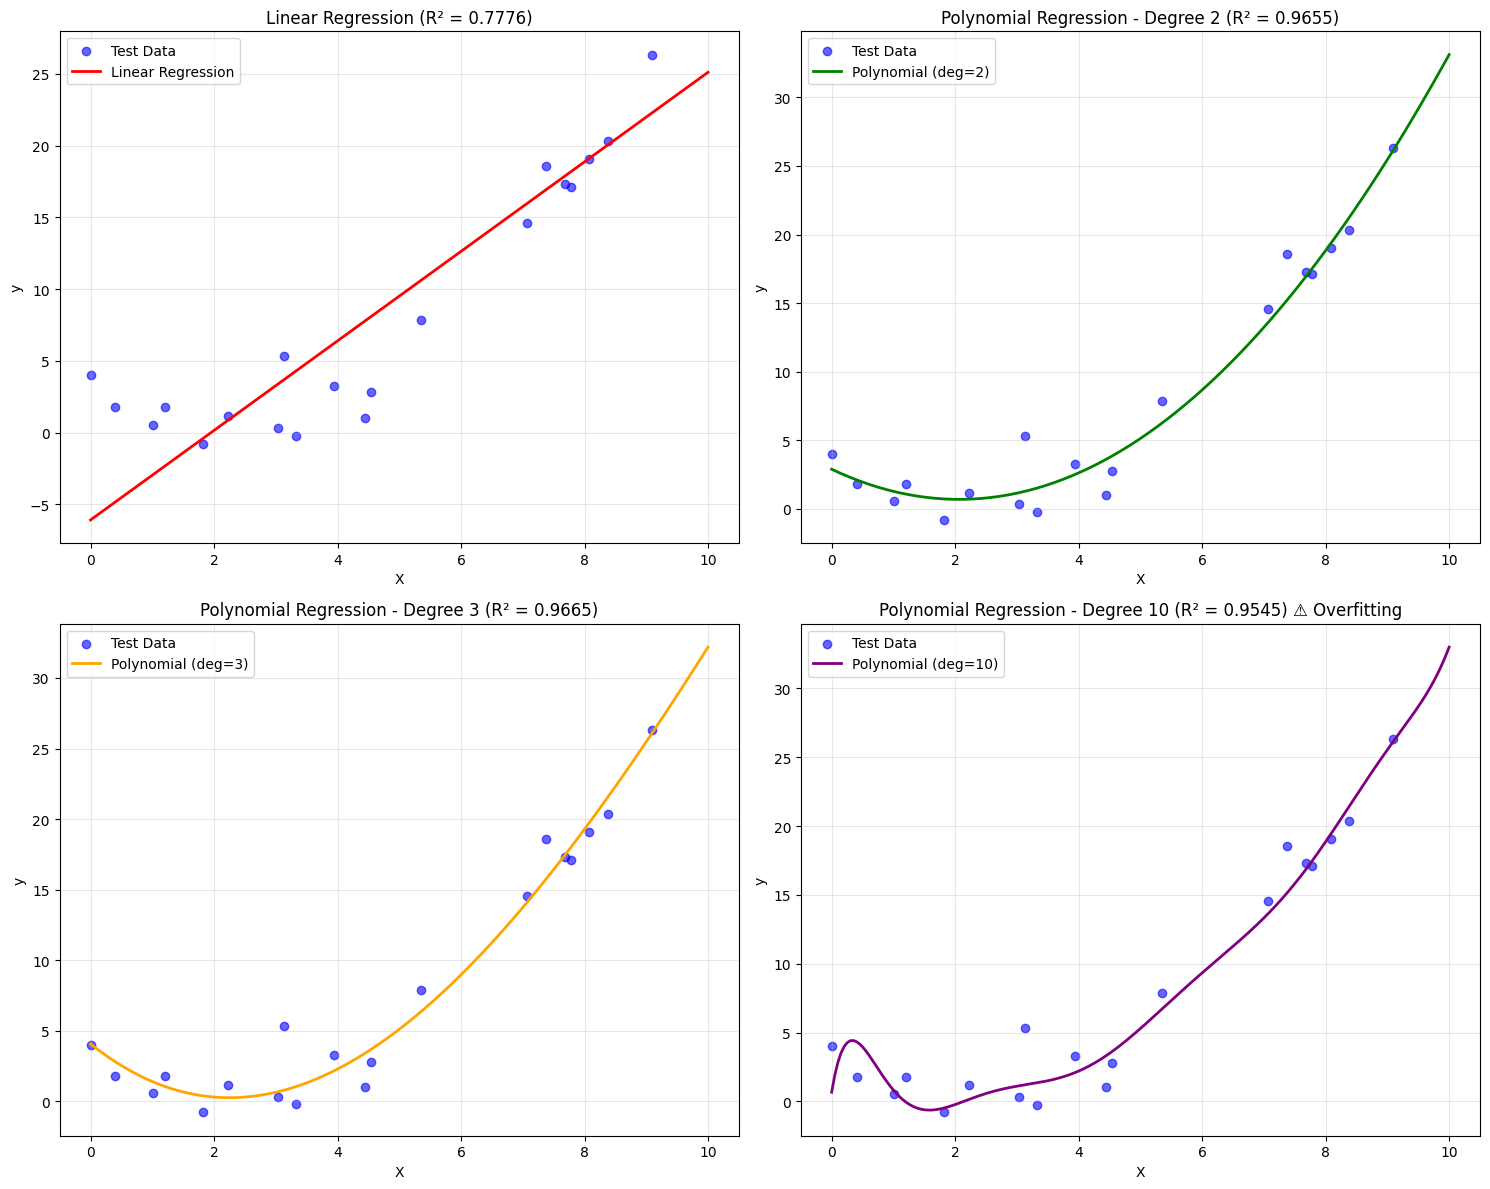

In [30]:
# Plot all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Linear
axes[0, 0].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue')
axes[0, 0].plot(X_plot, y_plot_linear, 'r-', linewidth=2, label='Linear Regression')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title(f'Linear Regression (R² = {linear_r2:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Degree 2
axes[0, 1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue')
axes[0, 1].plot(X_plot, y_plot_poly_2, 'g-', linewidth=2, label='Polynomial (deg=2)')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('y')
axes[0, 1].set_title(f'Polynomial Regression - Degree 2 (R² = {poly2_r2:.4f})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Degree 3
axes[1, 0].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue')
axes[1, 0].plot(X_plot, y_plot_poly_3, 'orange', linewidth=2, label='Polynomial (deg=3)')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_title(f'Polynomial Regression - Degree 3 (R² = {poly3_r2:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Degree 10 (Overfitting)
axes[1, 1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='blue')
axes[1, 1].plot(X_plot, y_plot_poly_10, 'purple', linewidth=2, label='Polynomial (deg=10)')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_title(f'Polynomial Regression - Degree 10 (R² = {poly10_r2:.4f}) ⚠️ Overfitting')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('polynomial_regression_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'polynomial_regression_comparison.png'")
plt.show()


## Step 9: Decision Framework - When to Use Polynomial Regression | الخطوة 9: إطار القرار - متى تستخدم الانحدار متعدد الحدود

**BEFORE**: You've learned how to build polynomial regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if polynomial regression is the right choice for your problem!

**Why this matters**: Using polynomial regression when it's not appropriate leads to:
- **Overfitting** → Model memorizes training data, fails on new data
- **Poor generalization** → High degree polynomials create wiggly curves
- **Wasted complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Linear vs Polynomial Regression | إطار القرار: الانحدار الخطي مقابل متعدد الحدود

**Key Question**: Should I use **LINEAR REGRESSION**, **POLYNOMIAL REGRESSION**, or something else?

#### Decision Tree:

```
What type of problem do you have?
├─ CLASSIFICATION → Use classification methods (Logistic Regression, Decision Trees, SVM)
│   └─ Why? Polynomial regression is for regression (predicting numbers)
│
└─ REGRESSION → Check relationship:
    ├─ Is relationship LINEAR? → Use LINEAR REGRESSION ✅
    │   └─ Why? Simpler, faster, more interpretable
    │
    └─ Is relationship NON-LINEAR? → Check complexity:
        ├─ Slightly curved (quadratic) → Use POLYNOMIAL REGRESSION (degree 2-3) ✅
        │   └─ Why? Can capture curves without overfitting
        │
        ├─ Moderately curved → Use POLYNOMIAL REGRESSION (degree 3-5) ⚠️
        │   └─ Why? Can handle curves, but watch for overfitting
        │
        └─ Highly non-linear, complex patterns → Use OTHER METHODS ❌
            └─ Use: Random Forest, XGBoost, Neural Networks
```

#### Detailed Decision Process:

```
Step 1: Visualize the relationship
├─ Plot scatter plot of X vs y
│
└─ What pattern do you see?
    ├─ Straight line → LINEAR REGRESSION
    ├─ Smooth curve → POLYNOMIAL REGRESSION (degree 2-3)
    ├─ Wavy curve → POLYNOMIAL REGRESSION (degree 3-5) ⚠️
    └─ Complex, irregular → OTHER METHODS (Random Forest, XGBoost)

Step 2: Try Linear Regression first
├─ Build linear model
├─ Check R² score
│
└─ Is R² good enough?
    ├─ YES (R² > 0.7) → Stick with LINEAR REGRESSION ✅
    └─ NO (R² < 0.7) → Try POLYNOMIAL REGRESSION

Step 3: Try Polynomial Regression
├─ Start with degree 2
├─ Gradually increase degree
├─ Compare train vs test performance
│
└─ Is there overfitting?
    ├─ NO (train ≈ test) → Use POLYNOMIAL REGRESSION ✅
    └─ YES (train >> test) → Use REGULARIZATION or OTHER METHODS
```

---

### 📊 Comparison Table: Linear vs Polynomial vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | Linear relationships | • Simple & fast<br>• Interpretable<br>• No overfitting risk | • Can't handle curves | Straight line patterns |
| **Polynomial (deg 2-3)** | Slightly curved relationships | • Handles curves<br>• Still interpretable<br>• Moderate complexity | • Can overfit if degree too high | Quadratic patterns |
| **Polynomial (deg 4-10)** | Moderately curved | • Handles complex curves | • High overfitting risk<br>• Less interpretable | Complex curves |
| **Ridge/Lasso** | Many features, overfitting | • Prevents overfitting<br>• Regularization | • More complex<br>• Hyperparameter tuning | High-dimensional data |
| **Random Forest** | Highly non-linear | • Handles any pattern<br>• Robust | • Less interpretable<br>• More complex | Very complex relationships |
| **XGBoost** | Best performance needed | • State-of-the-art<br>• Handles complexity | • Less interpretable<br>• Very complex | Competition-level problems |

---

### ✅ When Polynomial Regression IS Appropriate | متى يكون الانحدار متعدد الحدود مناسبًا

**Use Polynomial Regression when:**

1. **Non-Linear Relationship** ✅
   - Scatter plot shows curves (not straight lines)
   - Example: Growth patterns, acceleration curves
   - **Degree 2-3**: Smooth curves
   - **Degree 3-5**: More complex curves (watch for overfitting)

2. **Linear Regression Fails** ✅
   - Linear model has low R² (< 0.7)
   - Residuals show patterns (not random)
   - **Try**: Polynomial degree 2-3 first

3. **Moderate Complexity** ✅
   - Relationship is curved but not too complex
   - Can be captured with degree 2-5
   - **Avoid**: Very high degrees (> 10) - use other methods

4. **Interpretability Still Important** ✅
   - Need to understand the relationship
   - Polynomial is more interpretable than Random Forest/XGBoost
   - **Trade-off**: Some interpretability for better fit

5. **Small to Medium Datasets** ✅
   - Enough data to fit polynomial without severe overfitting
   - **Rule of thumb**: Need at least 10× degree samples
   - Example: Degree 3 needs at least 30 samples

---

### ❌ When Polynomial Regression IS NOT Appropriate | متى لا يكون الانحدار متعدد الحدود مناسبًا

**Don't use Polynomial Regression when:**

1. **Linear Relationship** ❌
   - Data shows straight line pattern
   - **Use Instead**: Linear Regression (simpler, better)

2. **Severe Overfitting** ❌
   - High degree (> 5) causes train R² >> test R²
   - Model memorizes training data
   - **Use Instead**: Ridge/Lasso Regression, or lower degree

3. **Highly Complex Patterns** ❌
   - Irregular, non-smooth patterns
   - Multiple local patterns
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

4. **Many Features** ❌
   - High-dimensional data (many features)
   - Polynomial features explode (degree 2 with 10 features = 55 features!)
   - **Use Instead**: Ridge/Lasso, or feature selection first

5. **Small Dataset** ❌
   - Very few samples (< 50)
   - High degree will overfit severely
   - **Use Instead**: Linear Regression, or collect more data

6. **Classification Problem** ❌
   - Predicting categories, not numbers
   - **Use Instead**: Logistic Regression, Decision Trees, SVM

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price vs Size (Curved) ✅ APPROPRIATE
- **Problem**: Predict price from size
- **Relationship**: Curved (price increases faster for larger houses)
- **Linear R²**: 0.65 (not great)
- **Polynomial R²**: 0.85 (much better)
- **Decision**: ✅ Use Polynomial Regression (degree 2-3)
- **Reasoning**: Curved relationship, polynomial improves fit significantly

#### Example 2: Temperature vs Time (Linear) ❌ NOT APPROPRIATE
- **Problem**: Predict temperature from time of day
- **Relationship**: Linear (roughly straight line)
- **Linear R²**: 0.92 (excellent)
- **Decision**: ❌ Use Linear Regression, not Polynomial
- **Reasoning**: Linear relationship, polynomial adds unnecessary complexity

#### Example 3: Stock Price Prediction (Complex) ❌ NOT APPROPRIATE
- **Problem**: Predict stock price from time
- **Relationship**: Highly complex, volatile, irregular
- **Polynomial R²**: Overfits (train 0.95, test 0.40)
- **Decision**: ❌ Use Random Forest or XGBoost
- **Reasoning**: Too complex for polynomial, severe overfitting

#### Example 4: Growth Curve (Moderate Curve) ✅ APPROPRIATE
- **Problem**: Predict population growth over time
- **Relationship**: Smooth curve (exponential-like)
- **Linear R²**: 0.55 (poor)
- **Polynomial R²**: 0.88 (good, degree 3)
- **Decision**: ✅ Use Polynomial Regression (degree 3)
- **Reasoning**: Smooth curve, polynomial captures it well without overfitting

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Try linear first** - Always start with linear regression as baseline
2. **Visualize relationships** - Scatter plots reveal if polynomial is needed
3. **Low R²? Try polynomial** - If linear R² < 0.7, try degree 2-3
4. **Watch for overfitting** - Compare train vs test performance
5. **Optimal degree** - Usually 2-3, rarely need > 5
6. **Too complex? Use other methods** - Random Forest/XGBoost for very complex patterns
7. **Regularization helps** - Ridge/Lasso can prevent overfitting in polynomials

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting sales from advertising spend
- **Relationship**: Curved (diminishing returns - more ads help less over time)
- **Linear R²**: 0.62
- **Decision**: ✅ Try Polynomial Regression (degree 2-3)

**Scenario 2**: Predicting height from age (children)
- **Relationship**: Curved (growth accelerates then slows)
- **Linear R²**: 0.58
- **Decision**: ✅ Use Polynomial Regression (degree 2-3)

**Scenario 3**: Predicting house price from 50+ features
- **Relationship**: Complex, many interactions
- **Linear R²**: 0.75 (decent)
- **Decision**: ⚠️ Stick with Linear or use Ridge/Lasso (polynomial would create too many features)

**Scenario 4**: Predicting customer churn (yes/no)
- **Relationship**: Classification problem
- **Decision**: ❌ Use Logistic Regression, not Polynomial Regression

---

**Connection to Next Steps**: 
- 📓 **Unit 2, Example 1: Ridge/Lasso** - For preventing overfitting in polynomials
- 📓 **Unit 2, Example 2: Cross-Validation** - For proper evaluation of polynomial models
- 📓 **Unit 3: Classification** - For predicting categories instead of numbers



8. Finding Optimal Polynomial Degree
إيجاد الدرجة المثلى لمتعدد الحدود

Optimal Degree: 3
الدرجة المثلى: 3
Best Test R²: 0.9665
✓ Plot saved as 'optimal_polynomial_degree.png'


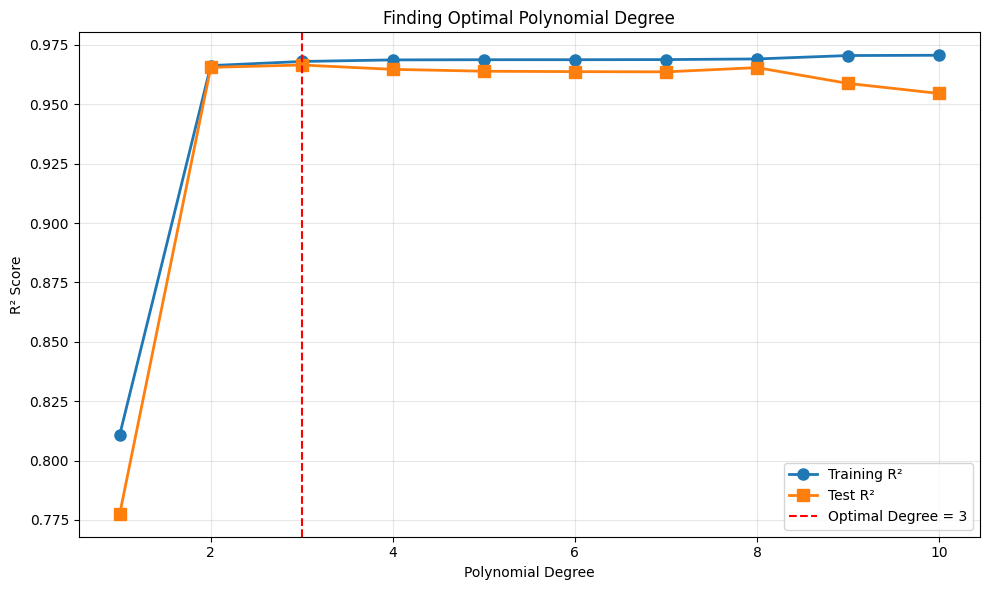


Example 5 Complete! ✓
اكتمل المثال 5! ✓


In [31]:
# 8. Finding Optimal Degree
# إيجاد الدرجة المثلى
print("\n" + "=" * 60)
print("8. Finding Optimal Polynomial Degree")
print("إيجاد الدرجة المثلى لمتعدد الحدود")
print("=" * 60)

degrees = range(1, 11)
train_scores = []
test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
# .fit_transform(data)
# - Two operations in one: .fit() then .transform()
#   1. .fit(): Learns parameters from data (mean/std, categories, etc.)
#   2. .transform(): Applies transformation using learned parameters
# - Use on training data
# - For test data, use only .transform() (don't refit!)

    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Find optimal degree (best test score)
optimal_degree = degrees[np.argmax(test_scores)]
print(f"\nOptimal Degree: {optimal_degree}")
print(f"الدرجة المثلى: {optimal_degree}")
print(f"Best Test R²: {max(test_scores):.4f}")

# Plot degree vs R² score
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, 'o-', label='Training R²', linewidth=2, markersize=8)
plt.plot(degrees, test_scores, 's-', label='Test R²', linewidth=2, markersize=8)
plt.axvline(optimal_degree, color='r', linestyle='--', label=f'Optimal Degree = {optimal_degree}')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Finding Optimal Polynomial Degree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimal_polynomial_degree.png', dpi=300, bbox_inches='tight')
print("✓ Plot saved as 'optimal_polynomial_degree.png'")
plt.show()

print("\n" + "=" * 60)
print("Example 5 Complete! ✓")
print("اكتمل المثال 5! ✓")
print("=" * 60)
